In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
%matplotlib inline

In [2]:
pd.read_csv('HRdataset.csv')

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [3]:
dataset = pd.read_csv('HRdataset.csv', index_col='EmpID')

In [4]:
dataset

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",0,0,1,1,5,3,0,65893,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
10301,"Ybarra, Catherine",0,0,0,5,5,1,0,48513,1,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
10010,"Zamora, Jennifer",0,0,0,1,3,4,0,220450,0,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [5]:
dataset.isnull().sum()

Employee_Name                   0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceScore                0
EngagementSurv

In [6]:
dataset.describe()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 10026 to 10271
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   MarriedID                   311 non-null    int64  
 2   MaritalStatusID             311 non-null    int64  
 3   GenderID                    311 non-null    int64  
 4   EmpStatusID                 311 non-null    int64  
 5   DeptID                      311 non-null    int64  
 6   PerfScoreID                 311 non-null    int64  
 7   FromDiversityJobFairID      311 non-null    int64  
 8   Salary                      311 non-null    int64  
 9   Termd                       311 non-null    int64  
 10  PositionID                  311 non-null    int64  
 11  Position                    311 non-null    object 
 12  State                       311 non-null    object 
 13  Zip                         311 no

In [8]:
dataset1 =dataset.fillna(0)

In [9]:
dataset1


,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",0,0,1,1,5,3,0,65893,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
10301,"Ybarra, Catherine",0,0,0,5,5,1,0,48513,1,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
10010,"Zamora, Jennifer",0,0,0,1,3,4,0,220450,0,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [10]:
dataset1

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",0,0,1,1,5,3,0,65893,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
10301,"Ybarra, Catherine",0,0,0,5,5,1,0,48513,1,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
10010,"Zamora, Jennifer",0,0,0,1,3,4,0,220450,0,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [11]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 10026 to 10271
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   MarriedID                   311 non-null    int64  
 2   MaritalStatusID             311 non-null    int64  
 3   GenderID                    311 non-null    int64  
 4   EmpStatusID                 311 non-null    int64  
 5   DeptID                      311 non-null    int64  
 6   PerfScoreID                 311 non-null    int64  
 7   FromDiversityJobFairID      311 non-null    int64  
 8   Salary                      311 non-null    int64  
 9   Termd                       311 non-null    int64  
 10  PositionID                  311 non-null    int64  
 11  Position                    311 non-null    object 
 12  State                       311 non-null    object 
 13  Zip                         311 no

In [12]:
#employees who are highly paid
Highly_paid= dataset1.groupby(['Employee_Name'])['Salary'].agg(['sum'])
Highly_paid.sort_values(by = 'sum', ascending = False)

,sum
Employee_Name,
"King, Janet",250000
"Zamora, Jennifer",220450
"Houlihan, Debra",180000
"Foss, Jason",178000
"Corleone, Vito",170500
...,...
"Kirill, Alexandra",45433
"Mahoney, Lauren",45395
"Rhoads, Thomas",45115


In [13]:
#employees who need special attention
Spec_atten= dataset1.groupby(['Employee_Name'])['PerfScoreID'].agg(['sum'])
Spec_atten.sort_values(by = 'sum' , ascending = True)

,sum
Employee_Name,
"Erilus, Angela",1
"Ybarra, Catherine",1
"Gonzalez, Juan",1
"Dee, Randy",1
"Sparks, Taylor",1
...,...
"Robinson, Elias",4
"Lindsay, Leonara",4
"Patronick, Lucas",4


In [14]:
dataset1['MarriedID'].value_counts() #124 employees are married and 187 employees are not married

MarriedID
0    187
1    124
Name: count, dtype: int64

In [15]:
dataset1_special = dataset1.loc[dataset1['PerformanceScore']== 'Exceeds', :] #Employees who need special attention
dataset1_special

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10002,"Anderson, Linda",0,0,0,1,5,4,0,57568,0,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
10012,"Barbossa, Hector",0,2,1,1,3,4,1,92328,0,...,Simon Roup,4.0,Diversity Job Fair,Exceeds,4.28,4,5,2/25/2019,0,9
10023,"Beak, Kimberly",1,1,0,2,5,4,0,70131,0,...,Kelley Spirea,18.0,Employee Referral,Exceeds,4.40,3,0,1/14/2019,0,16
10003,"Billis, Helen",1,1,0,1,5,4,0,62910,0,...,Brannon Miller,12.0,Indeed,Exceeds,5.00,3,0,2/27/2019,0,19
10001,"Candie, Calvin",0,0,1,1,5,4,0,72640,0,...,Janet King,2.0,Indeed,Exceeds,5.00,3,0,2/22/2019,0,14
10029,"Clukey, Elijian",1,1,1,2,5,4,0,50373,0,...,Brannon Miller,12.0,Employee Referral,Exceeds,4.10,4,0,2/28/2019,0,5
10019,"Corleone, Vito",0,0,1,1,5,4,0,170500,0,...,Janet King,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15
10028,"Dougall, Eric",0,0,1,1,3,4,0,138888,0,...,Jennifer Zamora,5.0,Indeed,Exceeds,4.30,5,5,1/4/2019,0,4


In [16]:
dataset1['Absences'].value_counts() #Number of absences

Absences
4     23
16    23
7     21
2     21
15    20
13    17
14    17
3     16
19    16
6     16
11    15
17    15
1     14
20    14
9     14
5     12
8     11
10    10
12     8
18     8
Name: count, dtype: int64

In [18]:
dataset2 = dataset1.groupby(['Employee_Name'])['SpecialProjectsCount'].agg(['sum']) #Employees with special projects
dataset2

,sum
Employee_Name,
"Adinolfi, Wilson K",0
"Ait Sidi, Karthikeyan",6
"Akinkuolie, Sarah",0
"Alagbe,Trina",0
"Anderson, Carol",0
...,...
"Woodson, Jason",0
"Ybarra, Catherine",0
"Zamora, Jennifer",6


# Data Visualization 

In [ ]:
#A visualisation on Recruitment source

In [21]:
dataset1['RecruitmentSource'].value_counts()

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

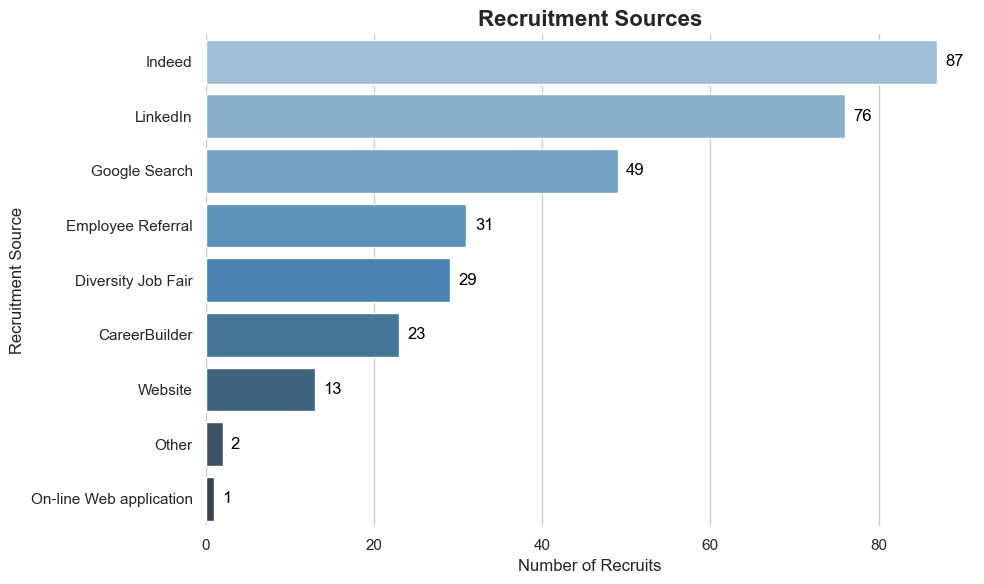

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recruitment source data
data = {
    'RecruitmentSource': ['Indeed', 'LinkedIn', 'Google Search', 'Employee Referral', 'Diversity Job Fair', 'CareerBuilder', 'Website', 'Other', 'On-line Web application'],
    'Count': [87, 76, 49, 31, 29, 23, 13, 2, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the visual aesthetics using Seaborn
sns.set(style="whitegrid", palette="muted")

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Sort the data by 'Count' in descending order
df_sorted = df.sort_values(by='Count', ascending=False)

# Create a bar plot with the y variable assigned to hue and disable the legend
ax = sns.barplot(x='Count', y='RecruitmentSource', data=df_sorted, hue='RecruitmentSource', palette="Blues_d", dodge=False, legend=False)

# Add a title and labels
plt.title('Recruitment Sources', fontsize=16, weight='bold')
plt.xlabel('Number of Recruits', fontsize=12)
plt.ylabel('Recruitment Source', fontsize=12)

# Add annotations to display exact count values on each bar
for index, value in enumerate(df_sorted['Count']):
    ax.text(value + 1, index, str(value), color='black', va="center")

# Customize the appearance: removing the frame around the chart
sns.despine(left=True, bottom=True)

# Show the plot
plt.tight_layout()
plt.show()
